In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

# Add src/ to Python path
project_root = Path.cwd().parent  # assuming notebook is inside notebooks/
src_path = project_root / "src"
sys.path.insert(0, str(src_path))

# Now you can import your module
from data_src.gridded_data_sources.cetb import CETBScene
from data_src.gridded_data_sources.era5 import ERA5Scene

from utils.grid_utils import Grid

In [2]:
cetb_scene = CETBScene.from_files(r"C:\Users\ehate\Desktop\ASP\ASP_code_projects\raw_data\CETB_AMSR2\2022-04\NSIDC0630_SIR_EASE2_N3.125km_GCOMW1_AMSR2_E_36H_20220401_2409032033_v2.0.nc")
cetb_scene.modify_extent([-4500000, -4500000, 4500000, 4500000])

era5_scene = ERA5Scene.from_dir(r"C:\Users\ehate\Desktop\ASP\ASP_code_projects\raw_data\ERA5_daily_raw_v2\2022_04")

era5_scene.regrid(cetb_scene.grid, method='linear')
scene = cetb_scene + era5_scene
scene

<xarray.Dataset> Size: 697MB
Dimensions:  (time: 1, y: 2880, x: 2880)
Coordinates:
  * time     (time) datetime64[ns] 8B 2022-04-01
  * y        (y) float64 23kB 4.498e+06 4.495e+06 ... -4.495e+06 -4.498e+06
  * x        (x) float64 23kB -4.498e+06 -4.495e+06 ... 4.495e+06 4.498e+06
Data variables: (12/21)
    36H      (time, y, x) float32 33MB dask.array<chunksize=(1, 1440, 1440), meta=np.ndarray>
    u10      (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    v10      (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    d2m      (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    t2m      (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    e        (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    ...       ...
    ssrd     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    strd     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    tciw     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    tclw     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    tcwv     (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>
    tp       (time, y, x) float32 33MB dask.array<chunksize=(1, 2880, 2880), meta=np.ndarray>

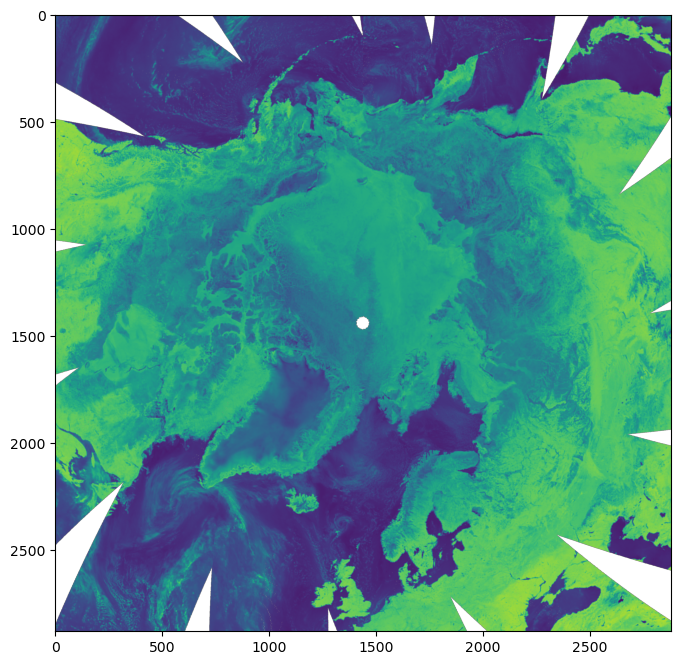

In [3]:
plt.figure(figsize=(10, 8))
plt.imshow(scene.data['36H'][0].values, cmap='viridis')

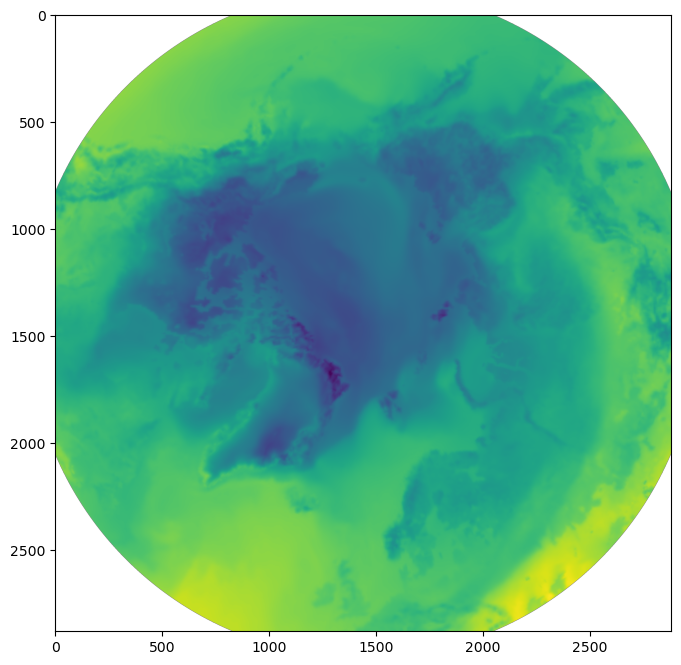

In [4]:
plt.figure(figsize=(10, 8))
plt.imshow(scene.data['t2m'][0].values, cmap='viridis')